In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cleaned_data_SQL.csv")
df.head()

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status
0,2001,John Doe,45,Male,Hypertension,Med A,1/10/2025,1/15/2025,Dr. Smith,Cardiology,admitted
1,2002,Jane Smith,45,Female,Diabetes,Med B,1/10/2025,15/01/2025,Dr. Lee,Endocrinology,admitted
2,2003,Bob Brown,55,Male,Asthma,Med C,1/10/2025,January 15 2025,Dr. Carter,Pulmonology,under observation
3,2004,Unassigned,30,Female,Flu,Med D,2/5/2025,2/10/2025,Unassigned,General Medicine,discharged
4,2005,Tom Wilson,62,Male,Heart Disease,Med E,3/1/2025,3/10/2025,Dr. Johnson,Cardiology,discharged


In [3]:
# remove leading/trailing spaces
df.columns = df.columns.str.strip()
df.head()
# strip() removes leading and trailing spaces from the column names

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status
0,2001,John Doe,45,Male,Hypertension,Med A,1/10/2025,1/15/2025,Dr. Smith,Cardiology,admitted
1,2002,Jane Smith,45,Female,Diabetes,Med B,1/10/2025,15/01/2025,Dr. Lee,Endocrinology,admitted
2,2003,Bob Brown,55,Male,Asthma,Med C,1/10/2025,January 15 2025,Dr. Carter,Pulmonology,under observation
3,2004,Unassigned,30,Female,Flu,Med D,2/5/2025,2/10/2025,Unassigned,General Medicine,discharged
4,2005,Tom Wilson,62,Male,Heart Disease,Med E,3/1/2025,3/10/2025,Dr. Johnson,Cardiology,discharged


In [4]:
# handle missing values
df.isnull().sum()

PatientID        0
Name             0
Age              0
Gender           0
Diagnosis        0
Medication       0
AdmissionDate    0
DischargeDate    0
Doctor           0
Department       0
Status           0
dtype: int64

In [5]:
# DischargeDate in row 2 has a different format than the rest of the rows
# so we need to convert it to the same format
df['DischargeDate'] = df['DischargeDate'].str.replace('January 15 2025', '1/15/2025')
df.head(15)

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status
0,2001,John Doe,45,Male,Hypertension,Med A,1/10/2025,1/15/2025,Dr. Smith,Cardiology,admitted
1,2002,Jane Smith,45,Female,Diabetes,Med B,1/10/2025,15/01/2025,Dr. Lee,Endocrinology,admitted
2,2003,Bob Brown,55,Male,Asthma,Med C,1/10/2025,1/15/2025,Dr. Carter,Pulmonology,under observation
3,2004,Unassigned,30,Female,Flu,Med D,2/5/2025,2/10/2025,Unassigned,General Medicine,discharged
4,2005,Tom Wilson,62,Male,Heart Disease,Med E,3/1/2025,3/10/2025,Dr. Johnson,Cardiology,discharged
5,2006,Susan Clark,49,Female,Kidney Disease,Med F,4/12/2025,4/17/2025,Dr. Patel,Nephrology,admitted
6,2007,David Jones,37,Male,Pneumonia,Med G,5/20/2025,5/25/2025,Dr. Martinez,Pulmonology,admitted
7,2008,Nancy Miller,28,Female,Flu,Med D,6/15/2025,6/20/2025,Dr. Smith,General Medicine,under observation
8,2009,Michael Scott,40,Male,Hypertension,Med A,7/1/2025,7/7/2025,Dr. Smith,Cardiology,admitted
9,2010,Pam Beesly,34,Female,Diabetes,Med B,8/10/2025,8/15/2025,Dr. Lee,Endocrinology,discharged


In [6]:
df.to_csv("Cleaned_data_Py.csv", index=False)

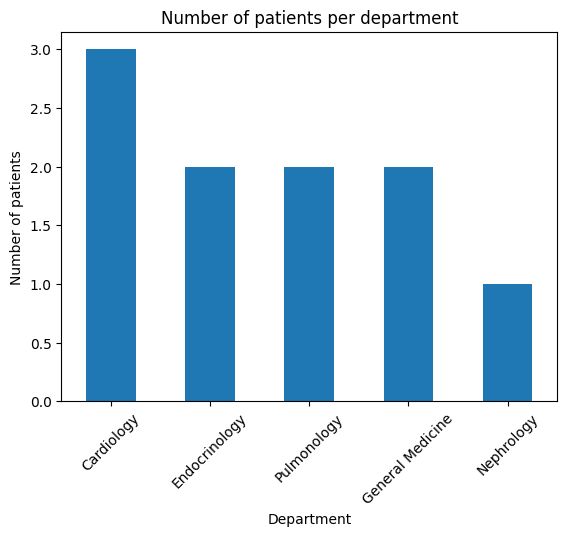

In [7]:
# Visualize the number of patients per department using a bar chart.
df['Department'].value_counts().plot(kind='bar')
plt.title('Number of patients per department')
plt.xlabel('Department')
plt.ylabel('Number of patients')
plt.xticks(rotation=45)
plt.show()

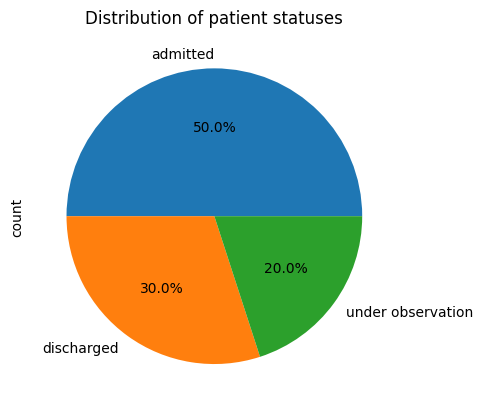

In [8]:
# Create a pie chart showing the distribution of patient statuses (Admitted, Discharged, Under Observation).
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of patient statuses')
plt.show()


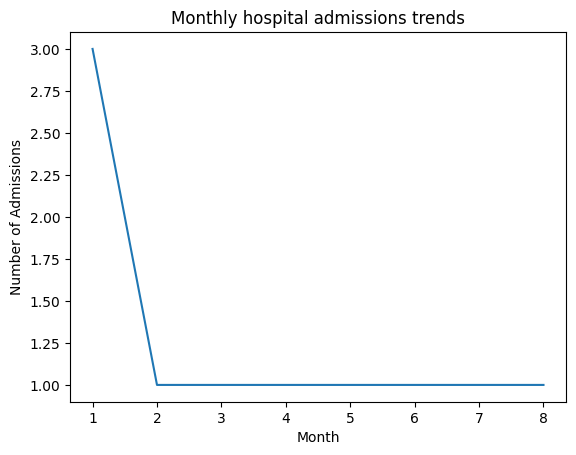

In [9]:
# Generate a line chart showing monthly hospital admissions trends.
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['AdmissionDate'].dt.month.value_counts().sort_index().plot(kind='line')
plt.title('Monthly hospital admissions trends')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.show()
